In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
X = boston.data
Y = boston.target
print(X.shape) #design matrix
print(Y.shape)

(506, 13)
(506,)


In [3]:
import numpy as np
import torch
np.random.seed(123) #in produzione si deve fissare un seed
torch.random.manual_seed(123);
idx = np.random.permutation(len(X))

In [4]:
X = X[idx]
Y = Y[idx]

In [5]:
X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(Y[50:])
X_testing = torch.Tensor(X[:50])
Y_testing = torch.Tensor(Y[:50])

In [6]:
theta = torch.Tensor(13) #creiamo un tensore di 13 unità
theta_0 = torch.Tensor(1) #tensore di una unità (bias)
#impostiamo required_grad
theta.requires_grad_(True)
theta_0.requires_grad_(True)
theta.data.normal_(0,0.1) #inizializziamo il tensore con numeri casuali tratti da una
#distribuzione normale di media 0 e varianza 0.1
theta_0.data.normal_(0,0.1) 
#media 0 perchè non vogliamo dare un bias ai parametri
#varianza piccola attorno allo 0 riduce il bias che diamo ai parametri
#le diverse componenti vivono nello stesso spazio

print(theta)
print(theta_0)

tensor([-0.0111,  0.0120, -0.0370, -0.0240, -0.1197,  0.0209, -0.0972, -0.0755,
         0.0324, -0.0109,  0.0210, -0.0391,  0.0235], requires_grad=True)
tensor([0.0665], requires_grad=True)


In [7]:
def linear_regression(input, theta, theta_0):
    return input.mul(theta).sum(1)+theta_0

In [8]:
x=X_training[0]

In [10]:
print(x.mul(theta).sum(1))

tensor(-20.8855, grad_fn=<SumBackward0>)


In [14]:
print(X_training.mul(theta).sum(1)[0]+theta_0)

tensor([-20.8190], grad_fn=<AddBackward0>)


In [13]:
y = linear_regression(X_training,theta,theta_0)
print(y[:10]) #stampiamo i primi 10 valori predetti

tensor([-20.8190, -23.3360, -24.6247, -31.4600, -27.4998, -28.1950, -27.1047,
        -26.2724, -18.8539, -31.4594], grad_fn=<SliceBackward>)


In [15]:
def loss(input, target):
    return ((input-target)**2).mean()

In [16]:
print(loss(y,Y_training)) #l'unità di misura è dollari al quadrato

tensor(2274.0801, grad_fn=<MeanBackward0>)


In [17]:
means = X_training.mean(0)
stds = X_training.std(0)
print(means, stds)

tensor([3.5481e+00, 1.1293e+01, 1.1224e+01, 6.1404e-02, 5.5591e-01, 6.2701e+00,
        6.8338e+01, 3.7963e+00, 9.5658e+00, 4.0893e+02, 1.8468e+01, 3.5775e+02,
        1.2820e+01]) tensor([8.4949e+00, 2.3287e+01, 6.9195e+00, 2.4033e-01, 1.1805e-01, 6.9616e-01,
        2.8338e+01, 2.1295e+00, 8.7019e+00, 1.6880e+02, 2.1430e+00, 9.0201e+01,
        7.1928e+00])


La normalizzazione la effettuiamo utilizzando la media e la deviazione standard del set di training. Tre motivi:
- Se ricalcolo le statistiche dal test set potrebbero trovarsi in un altro spazio rispetto a quelli di training 
- Ricalcolare le statistiche significa che dobbiamo ritrainare i parametri
- I dati di test si presentano ad uno ad uno e quindi le statistiche non possono essere calcolate su di essi

In [20]:
lr = 0.1
epochs = 10 #iterazioni
# Passo 1: normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo i pesi come visto in precedenza
theta = torch.Tensor(13);
theta_0 = torch.Tensor(1);
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)
theta.requires_grad_(True)
theta_0.requires_grad_(True)
for e in range(epochs):
    #Passo 3: calcoliamo le predizioni
    y = linear_regression(X_training_norm,theta,theta_0)

    #Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)
    #Passo 5: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()
    #stampiamo il valore della loss
    print("Epoch: {}, loss: {:0.2f}".format(e,l.item()))

    #Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    #azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

Epoch: 0, loss: 576.80
Epoch: 1, loss: 356.54
Epoch: 2, loss: 234.76
Epoch: 3, loss: 157.96
Epoch: 4, loss: 108.91
Epoch: 5, loss: 77.52
Epoch: 6, loss: 57.42
Epoch: 7, loss: 44.53
Epoch: 8, loss: 36.24
Epoch: 9, loss: 30.91


In [21]:
lr = 0.1
epochs = 50
# Passo 1: normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo i pesi come visto in precedenza
theta = torch.Tensor(13);
theta_0 = torch.Tensor(1);
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)
theta.requires_grad_(True)
theta_0.requires_grad_(True)
losses = []
for e in range(epochs):
    #Passo 3: calcoliamo le predizioni
    y = linear_regression(X_training_norm,theta,theta_0)

    #Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)
    #Passo 5: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()
    #conserviamo il valore della loss
    losses.append(l.item())
    #Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    #azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

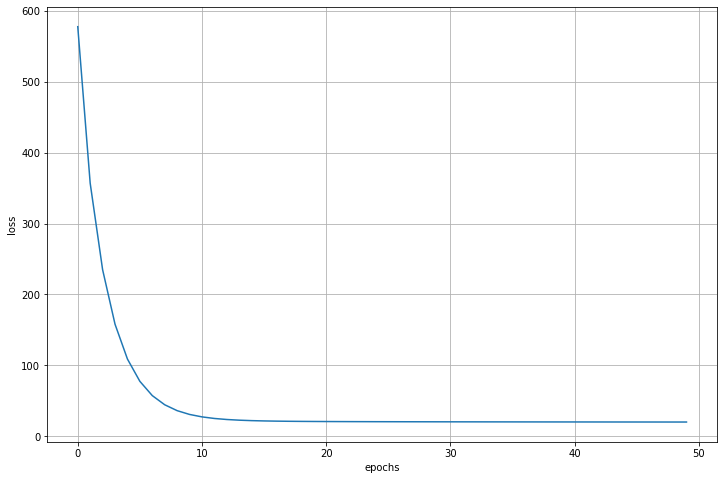

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [27]:
#iniziamo calcolando le predizioni del modello dati i pesi allenati
yt = linear_regression(X_testing_norm,theta,theta_0)
#calcoliamo il valore della loss
print(loss(yt, Y_testing))

tensor(42.8853, grad_fn=<MeanBackward0>)


In [28]:
lr = 0.1
epochs = 50
# Passo 1: normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo i pesi come visto in precedenza
theta = torch.Tensor(13);
theta_0 = torch.Tensor(1);
theta.normal_(0,0.01)
theta_0.normal_(0,0.01)
theta.requires_grad_(True)
theta_0.requires_grad_(True)
losses_train = []
losses_test = []
for e in range(epochs):
    #Passo 3: calcoliamo le predizioni
    y = linear_regression(X_training_norm,theta,theta_0)

    #Passo 4: calcoliamo il valore della loss
    l = loss(y, Y_training)
    #conserviamo il valore della loss di training
    losses_train.append(l.item())
    #Passo 5: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()
    #Passo 6: Aggiorniamo i pesi
    theta.data.sub_(lr*theta.grad.data)
    theta_0.data.sub_(lr*theta_0.grad.data)

    #azzeriamo i gradienti per evitare di accumularli
    theta.grad.data.zero_()
    theta_0.grad.data.zero_()

    #calcoliamo la loss sul test set
    #dato che non dobbiamo calcolare i gradienti
    #li disabilitiamo per risparmiare memoria
    #questa notazione è di pytorch per disabilitare i gradienti
    with torch.set_grad_enabled(False):
        y_test = linear_regression(X_testing_norm, theta, theta_0)
        loss_test = loss(y_test, Y_testing)
        losses_test.append(loss_test.item())

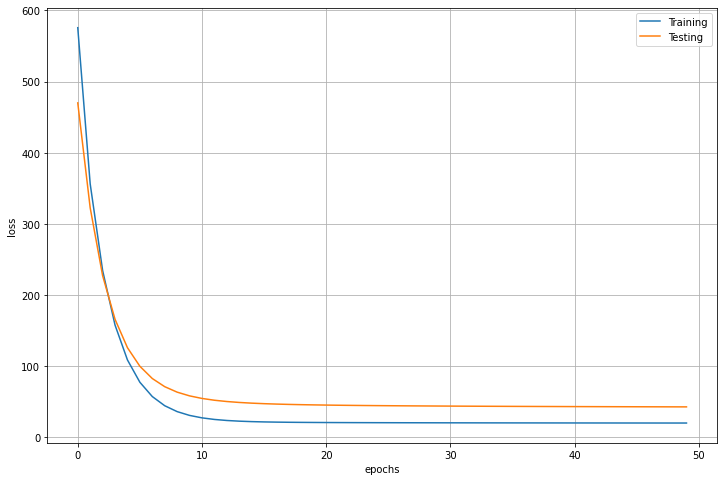

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses_train)
plt.plot(losses_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend(['Training','Testing'])
plt.show()

Esercizio. y = Ax + b. Dove stanno le feature e dove le variabili?

In [30]:
from torch import nn
linear = nn.Linear(20,10)

In [31]:
par = list(linear.parameters())
print(par[0].shape) # Matrice A [m x n]
print(par[1].shape) # Vettore b [m]

torch.Size([10, 20])
torch.Size([10])


In [32]:
#costruiamo una matrice di 150 elementi a 20 dimensioni
sample_input = torch.rand((150,20))
#otteniamo una matrice di 150 elementi a 10 dimensioni
sample_output = linear(sample_input)
# abbiamo svolto l'operazione y = Ax + b
print(sample_output.shape)

torch.Size([150, 10])


In [33]:
linreg = nn.Linear(13,1)
z = linreg(X_training_norm)
print(z.shape)

torch.Size([456, 1])


optimizer.step() #ottimizzazione <br>
optimizer.zero_grad() #sostituisce il data.zero_grad